In [4]:
import pandas as pd

df = pd.read_csv('/home/saswat-tulo/Projects/Note App (Flask + Vue)/backend/uploads/sample_data.csv')

In [5]:
df

,Name,Age,Department,Salary,Joining Date
0,Ivy,32,Sales,81448,2018-03-19
1,Hank,40,IT,115743,2023-03-08
2,Hank,51,Marketing,86908,2016-07-11
3,Hank,36,HR,71587,2015-07-27
4,Bob,35,IT,57225,2020-07-30
...,...,...,...,...,...
495,Jack,56,Finance,51605,2015-12-14
496,Grace,26,Finance,81190,2021-03-16
497,Eve,44,Sales,99457,2018-03-03
498,Eve,52,Marketing,98061,2024-12-22


In [6]:
# Average salary by department
avg_salary_by_department = df.groupby('Department')['Salary'].mean()
print(avg_salary_by_department)

# Count of employees per department
employee_count = df['Department'].value_counts()
print(employee_count)


Department
Finance      69295.885057
HR           69980.655556
IT           82735.037736
Marketing    75492.546296
Sales        70727.816514
Name: Salary, dtype: float64
Department
Sales        109
Marketing    108
IT           106
HR            90
Finance       87
Name: count, dtype: int64


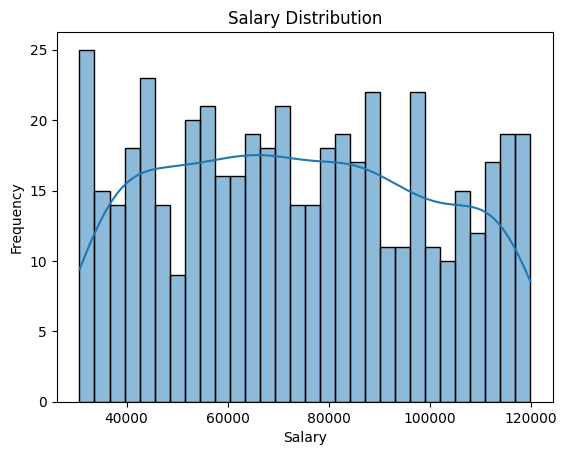

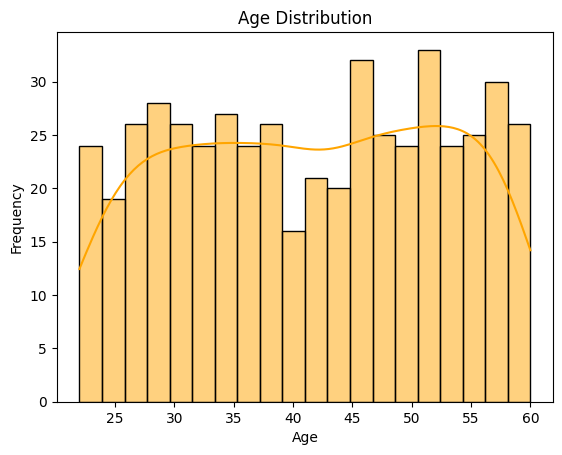

In [11]:
# Salary distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True, color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Joining Year
2015    57
2016    61
2017    49
2018    50
2019    32
2020    49
2021    41
2022    47
2023    47
2024    65
2025     2
Name: count, dtype: int64


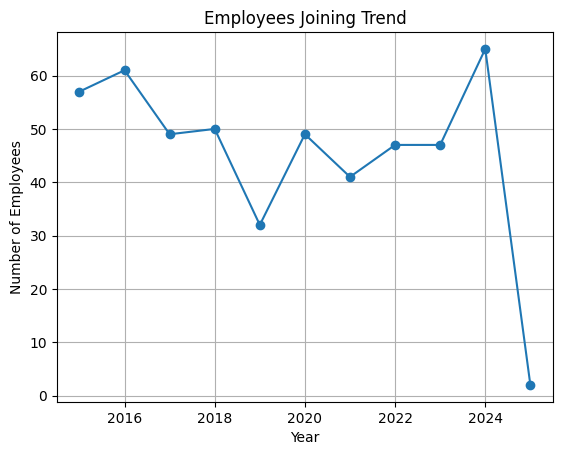

In [12]:
# Extract year of joining
df['Joining Year'] = pd.to_datetime(df['Joining Date']).dt.year

# Employee count by year
joining_trend = df['Joining Year'].value_counts().sort_index()
print(joining_trend)

# Plot joining trend
joining_trend.plot(kind='line', marker='o', title='Employees Joining Trend')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()


In [13]:
# Top 5 highest-paid employees
top_salaries = df.nlargest(5, 'Salary')
print(top_salaries)


        Name  Age Department  Salary Joining Date  Joining Year
481     Jack   33         IT  119872   2015-07-16          2015
74     Diana   25         IT  119619   2015-07-14          2015
77   Charlie   58         IT  119366   2023-05-11          2023
57       Eve   22         IT  119359   2020-01-01          2020
121    Frank   29    Finance  119222   2024-10-23          2024


             Age    Salary
Age     1.000000 -0.103803
Salary -0.103803  1.000000


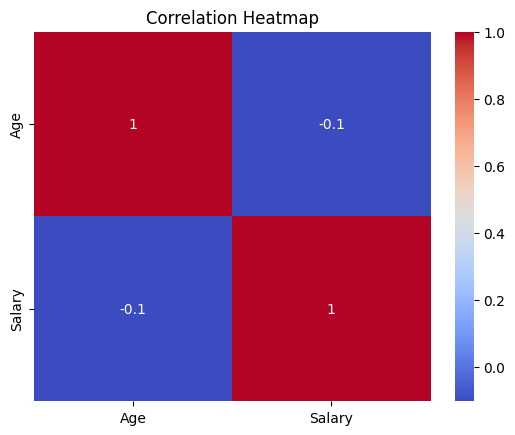

In [14]:
# Correlation matrix
correlation = df[['Age', 'Salary']].corr()
print(correlation)

# Heatmap of correlations
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Department
Finance      40.873563
HR           41.866667
IT           40.452830
Marketing    41.814815
Sales        42.247706
Name: Age, dtype: float64
Age Group
50-60    138
30-40    131
40-50    122
20-30    109
Name: count, dtype: int64


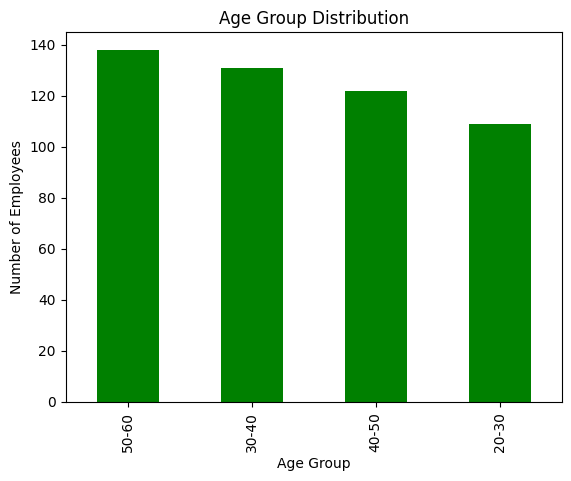

In [15]:
# Average age per department
avg_age_by_department = df.groupby('Department')['Age'].mean()
print(avg_age_by_department)

# Employees grouped by age range
df['Age Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
age_group_count = df['Age Group'].value_counts()
print(age_group_count)

# Plot age group distribution
age_group_count.plot(kind='bar', title='Age Group Distribution', color='green')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()


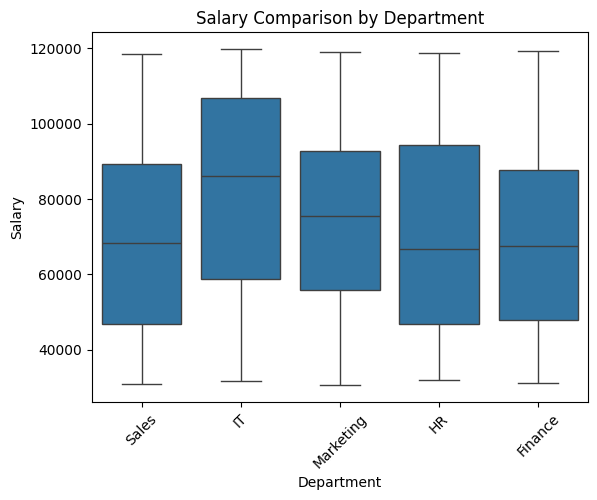

In [16]:
# Boxplot for department salaries
sns.boxplot(x='Department', y='Salary', data=df)
plt.title('Salary Comparison by Department')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Employees with salary > 100,000
high_salary_employees = df[df['Salary'] > 100000]
print(high_salary_employees)

# Employees in IT department
it_employees = df[df['Department'] == 'IT']
print(it_employees)


        Name  Age Department  Salary Joining Date  Joining Year Age Group
1       Hank   40         IT  115743   2023-03-08          2023     30-40
8       Jack   23         IT  106443   2018-01-30          2018     20-30
16     Alice   31         IT  118112   2016-11-05          2016     30-40
26       Ivy   57    Finance  110386   2017-04-24          2017     50-60
38   Charlie   28  Marketing  119106   2017-01-03          2017     20-30
..       ...  ...        ...     ...          ...           ...       ...
481     Jack   33         IT  119872   2015-07-16          2015     30-40
484      Ivy   51         HR  115236   2019-03-01          2019     50-60
491  Charlie   50         IT  108116   2022-06-29          2022     40-50
494      Bob   28         IT  114054   2021-06-06          2021     20-30
499      Ivy   54      Sales  104470   2022-01-03          2022     50-60

[98 rows x 7 columns]
        Name  Age Department  Salary Joining Date  Joining Year Age Group
1       Hank   

In [18]:
# Custom aggregation: mean age and salary by department
custom_agg = df.groupby('Department').agg({'Age': 'mean', 'Salary': ['mean', 'max', 'min']})
print(custom_agg)


                  Age        Salary               
                 mean          mean     max    min
Department                                        
Finance     40.873563  69295.885057  119222  31047
HR          41.866667  69980.655556  118712  31881
IT          40.452830  82735.037736  119872  31805
Marketing   41.814815  75492.546296  119106  30672
Sales       42.247706  70727.816514  118480  30973
